<a href="https://colab.research.google.com/github/syma-afsha/AI_LAB/blob/main/Syma_Main_Exam_Methods_and_Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NEPTUN ID: DGLTNJ**

 **Name: Syma Afsha**

# **QUESTION 1**

**(a)**

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/dataset.csv'
data_csv = pd.read_csv(file_path)
data = data_csv.values
print("Data Shape:", data.shape)


Data Shape: (17500, 2)


**(b)**

In [74]:
data_csv.describe()

,x0,x1
count,17500.000000,17500.000000
mean,6.160934,0.000080
std,2.352252,0.000041
min,-2.211225,-0.000031
25%,4.560658,0.000047
50%,6.122989,0.000075
75%,7.754616,0.000116
max,15.092030,0.000196


**Data Standardization**

In [75]:
data_range = np.ptp(data, axis=0)
print("Data Range:", data_range)
data_standardized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
print(data_standardized)

Data Range: [1.73032551e+01 2.27149546e-04]
[[-0.10717046 -1.22898527]
 [-0.80797325  1.30387953]
 [ 0.69043594  0.36514051]
 ...
 [ 1.04250188 -0.61400028]
 [ 0.96795711 -0.35384737]
 [ 0.52388091 -1.09327824]]


**(c)**

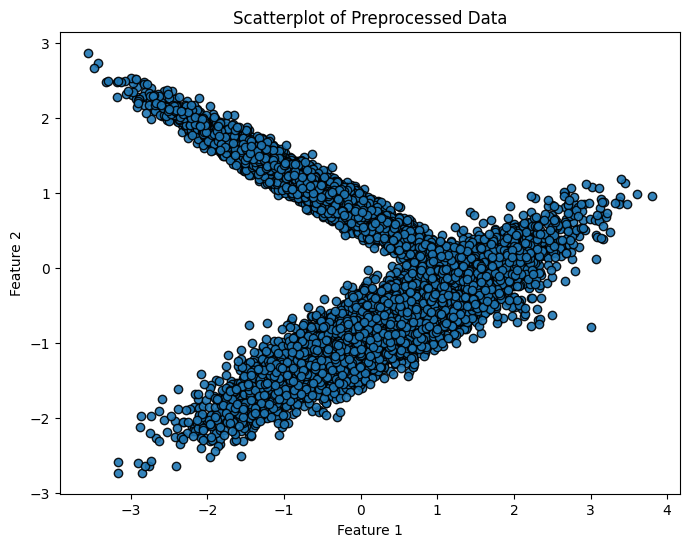

Estimated K: 2


In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(data_standardized[:, 0], data_standardized[:, 1], alpha=0.9,edgecolors="black")
plt.title("Scatterplot of Preprocessed Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
K = 2
print(f"Estimated K: {K}")


**(d)**

In [77]:
n, d = data_standardized.shape
np.random.seed(42)
centers = np.random.uniform(-1, 1, size=(K, d))  # Random initial cluster centers
covariances = [np.eye(d) for _ in range(K)]      # Identity covariance matrices
weights = np.ones(K) / K                         # Equal weights initially

max_iter = 100
tol = 1e-6
log_likelihood = 0

for iteration in range(max_iter):
    # E-Step: Compute responsibilities
    responsibilities = np.zeros((n, K))
    for k in range(K):
        diff = data_standardized - centers[k]
        inv_cov = np.linalg.inv(covariances[k])
        exp_term = np.exp(-0.5 * np.sum(diff @ inv_cov * diff, axis=1))
        det_cov = np.linalg.det(covariances[k])
        responsibilities[:, k] = weights[k] * exp_term / (np.sqrt((2 * np.pi)**d * det_cov))
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    # M-Step: Update parameters
    N_k = responsibilities.sum(axis=0)
    for k in range(K):
        centers[k] = (responsibilities[:, k][:, None] * data_standardized).sum(axis=0) / N_k[k]
        diff = data_standardized - centers[k]
        covariances[k] = (responsibilities[:, k][:, None, None] * diff[:, :, None] @ diff[:, None, :]).sum(axis=0) / N_k[k]
    weights = N_k / n

    # Compute log-likelihood
    new_log_likelihood = 0
    for k in range(K):
        diff = data_standardized - centers[k]
        inv_cov = np.linalg.inv(covariances[k])
        exp_term = np.exp(-0.5 * np.sum(diff @ inv_cov * diff, axis=1))
        det_cov = np.linalg.det(covariances[k])
        new_log_likelihood += np.sum(weights[k] * exp_term / (np.sqrt((2 * np.pi)**d * det_cov)))

    if np.abs(new_log_likelihood - log_likelihood) < tol:
        break
    log_likelihood = new_log_likelihood

print("Final Centers (means):")
print(np.array(centers))

print("\nFinal Covariances:")
for cov in covariances:
    print(cov)

Final Centers (means):
[[-0.47459138  0.97653206]
 [ 0.35917181 -0.73904163]]

Final Covariances:
[[ 0.73465084 -0.41536948]
 [-0.41536948  0.24734398]]
[[0.9013526  0.46883736]
 [0.46883736 0.30173138]]


**(e)**

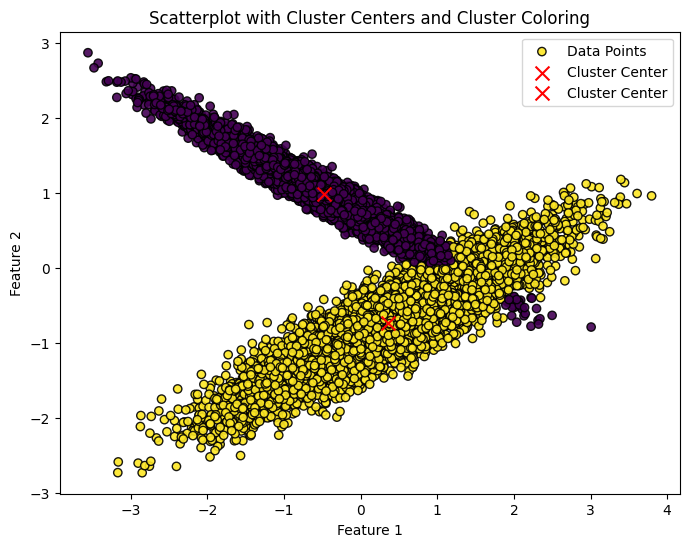

In [80]:
plt.figure(figsize=(8, 6))
colors = responsibilities.argmax(axis=1)  #colors based on the most likely cluster
plt.scatter(data_standardized[:, 0], data_standardized[:, 1], c=colors, cmap='viridis',edgecolors="black", alpha=0.9, label="Data Points")
for center in centers:
    plt.scatter(center[0], center[1], color='red', marker='x', s=100, label="Cluster Center")
plt.title("Scatterplot with Cluster Centers and Cluster Coloring")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


# **QUESTION 2**

**(c)**

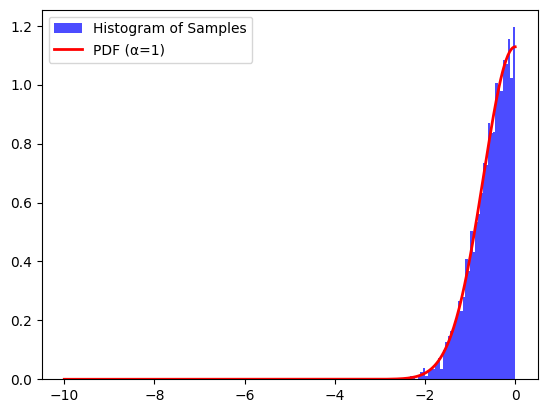

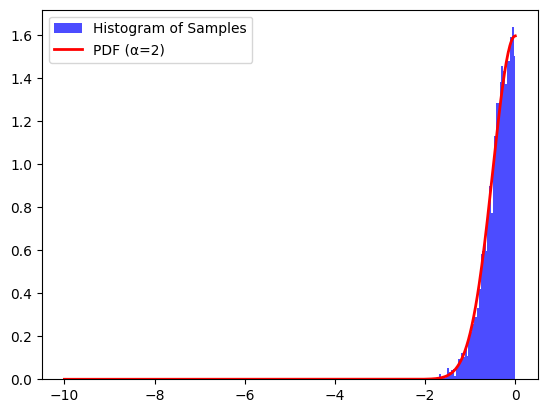

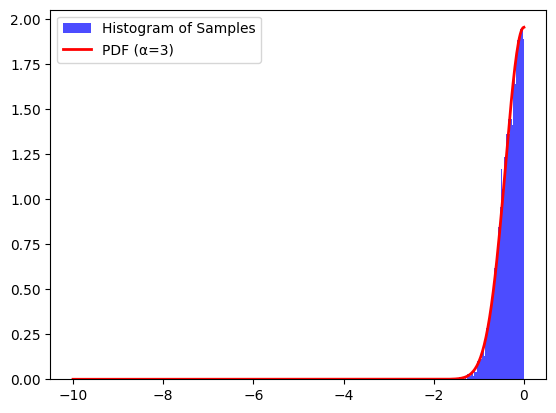

In [54]:
#pdf
def pdf(alpha,x):
  A= 2*np.sqrt(alpha/np.pi)
  return A* np.exp(-alpha* x**2)

#Generate samples
def generate_samples(num_samples,alpha):
  z=1/np.sqrt(2*alpha)
  samples = np.random.normal(0,z,num_samples)
  return samples[samples <= 0]

#Plot the histogram
def hist(num_samples,alpha):
  samples=generate_samples(num_samples,alpha)
  plt.hist(samples, bins=50, density=True, alpha=0.7, color='blue', label='Histogram of Samples')
  x_val=np.linspace(-10,0,500)
  pdf_val=pdf(alpha,x_val)
  plt.plot(x_val, pdf_val, 'r-', lw=2, label=f'PDF (α={alpha})')
  plt.legend()
  plt.show()

#For three different values of α (α = 1,2, and 3)
alpha=[1,2,3]
for a in alpha:
  hist(10000,a)

**(d)**

In [55]:
#Compute mean and Variance
def compute_mean_variance(num_samples,alpha):
  samples=generate_samples(num_samples,alpha)
  mean=np.mean(samples)
  variance=np.var(samples)

  mean_theory=-1/(np.sqrt(alpha*np.pi))
  print(f"Alpha = {alpha}:")
  print(f"Mean:{mean:.4f}, Theoretical_Mean:{mean_theory:.4f}")
  print(f"variance:{variance:.4f}")
  return mean,mean_theory,variance

#For three different values of α (α = 1,2, and 3)
alpha=[1,2,3]
for a in alpha:
  compute_mean_variance(10000,a)




Alpha = 1:
Mean:-0.5682, Theoretical_Mean:-0.5642
variance:0.1835
Alpha = 2:
Mean:-0.3989, Theoretical_Mean:-0.3989
variance:0.0935
Alpha = 3:
Mean:-0.3308, Theoretical_Mean:-0.3257
variance:0.0625
